## Import Required Libraries
This imports all necessary data handling, visualization, machine learning, and performance evaluation libraries.
RandomOverSampler is used to handle class imbalance.
StandardScaler ensures all features are on the same scale.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


## Load and Explore the Dataset
df.info() helps check for missing values & data types.
df.describe() gives insights into mean, min, max, and standard deviation of numerical features.

In [6]:
# Load dataset
df = pd.read_csv("Dataset.csv")

# Check data info (missing values & data types)
df.info()

# Summary statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


## Handle Missing Values
Missing values are filled with the column mean to ensure no empty values.

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)


##  Class Distribution (Sepsis vs. Non-Sepsis)
Pie chart visualizes the proportion of patients with and without sepsis.

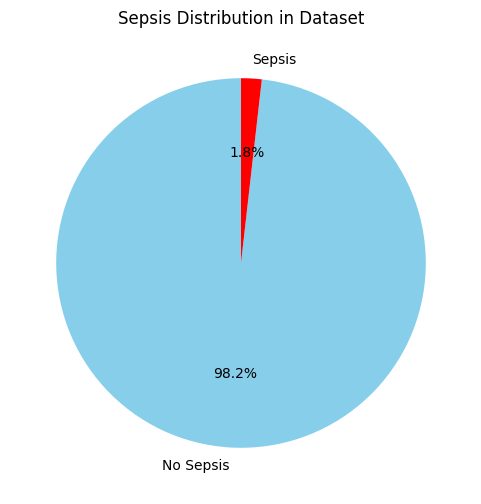

In [10]:
sepsis_counts = df["SepsisLabel"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sepsis_counts, labels=["No Sepsis", "Sepsis"], autopct='%1.1f%%', colors=["skyblue", "red"], startangle=90)
plt.title("Sepsis Distribution in Dataset")
plt.show()


## Feature Selection and Scaling
This code drops the target variable, scale features, and handle missing values.

In [11]:
X = df.drop(columns=["SepsisLabel"])
y = df["SepsisLabel"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Handle Class Imbalance Using SMOTE
Since sepsis cases are less frequent, i oversample the minority class.

In [21]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


## Train-Test Split
Splitting data into 80% training and 20% testing.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (2438870, 43)
Testing Set Shape: (609718, 43)


## Sepsis Rate by Gender
Groups sepsis cases by gender.
Uses a bar chart to compare male vs female sepsis rates.


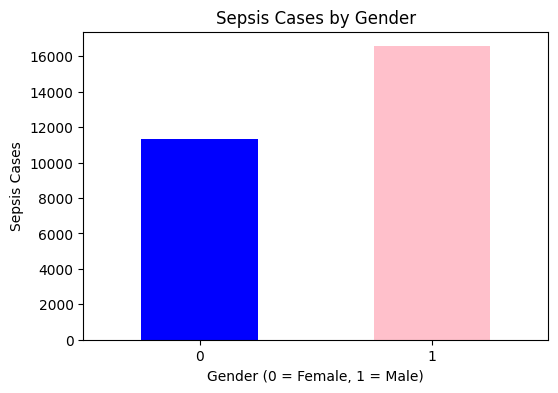

In [27]:
sepsis_by_gender = df.groupby("Gender")["SepsisLabel"].sum()

plt.figure(figsize=(6,4))
sepsis_by_gender.plot(kind="bar", color=["blue", "pink"])
plt.title("Sepsis Cases by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Sepsis Cases")
plt.xticks(rotation=0)
plt.show()


## ICU Stay vs. Sepsis 
Box plot compares ICU stay duration for sepsis vs non-sepsis patients.

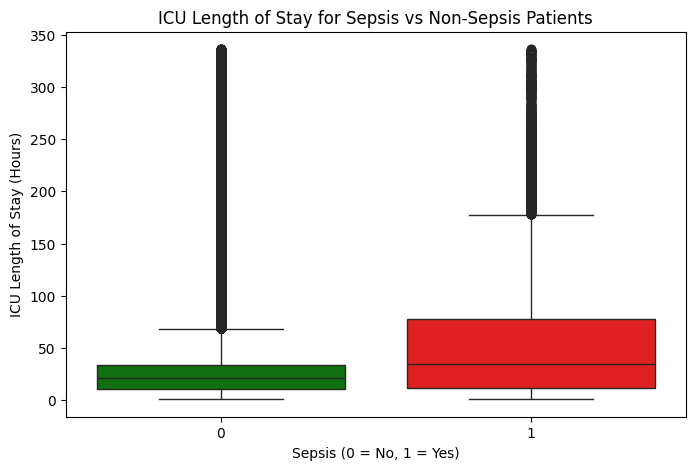

In [16]:
# Boxplot for ICU Length of Stay
plt.figure(figsize=(8,5))
sns.boxplot(x="SepsisLabel", y="ICULOS", data=df, palette=["green", "red"])
plt.title("ICU Length of Stay for Sepsis vs Non-Sepsis Patients")
plt.xlabel("Sepsis (0 = No, 1 = Yes)")
plt.ylabel("ICU Length of Stay (Hours)")
plt.show()


## Age Distribution
Histogram shows the age distribution of patients.

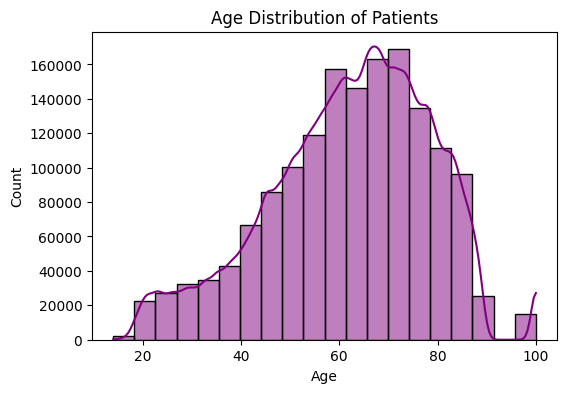

In [17]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="purple")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Feature Scaling
The dataset contains numeric values in different ranges.
StandardScaler() ensures all features have zero mean and unit variance.

In [13]:
# Drop unnecessary columns (e.g., "Unnamed: 0", "Patient_ID")
columns_to_drop = ["Unnamed: 0", "Patient_ID"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Handle missing values (fill numeric columns with their mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Separate features and target variable
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed! X_scaled is now defined.")

Feature scaling completed! X_scaled is now defined.


## PCA (Dimensionality Reduction)
The dataset has many features, making it computationally expensive.
PCA(n_components=2) reduces data into 2 components for easy visualization.
K-Means Clustering: I applied K-Means to identify 3 patient groups based on PCA-reduced features.
This helps in understanding different patient risk categories.

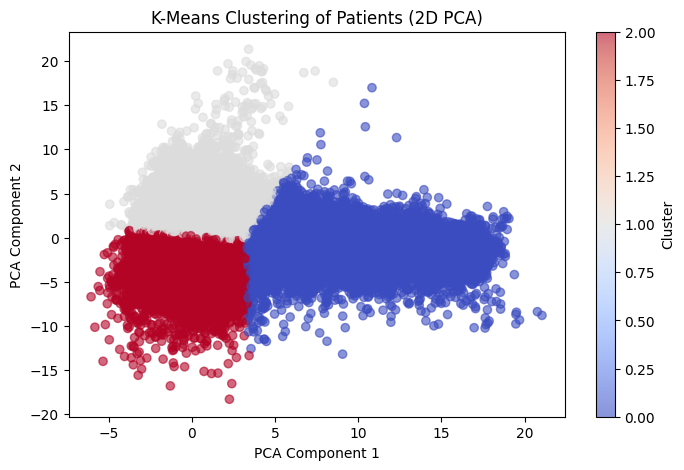

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Scatter plot of clusters
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="coolwarm", alpha=0.6)
plt.title("K-Means Clustering of Patients (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


## Scatter Plot for Dataset Components
 This scatter plot visualizes the relationship between Heart Rate (HR) and Oxygen Saturation (O2Sat), coloring points based on SepsisLabel.

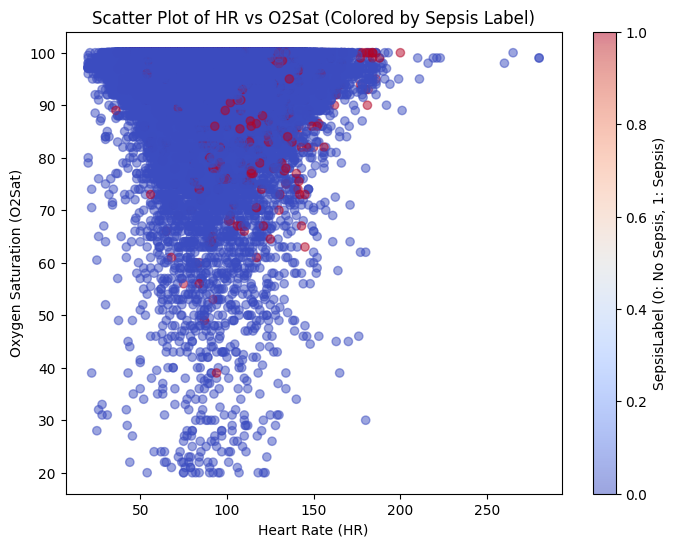

In [12]:
# Scatter plot to visualize two important components
plt.figure(figsize=(8,6))
plt.scatter(df["HR"], df["O2Sat"], c=df["SepsisLabel"], cmap="coolwarm", alpha=0.5)
plt.xlabel("Heart Rate (HR)")
plt.ylabel("Oxygen Saturation (O2Sat)")
plt.title("Scatter Plot of HR vs O2Sat (Colored by Sepsis Label)")
plt.colorbar(label="SepsisLabel (0: No Sepsis, 1: Sepsis)")
plt.show()


## Bar Chart Showing Feature Distributions
This bar chart provides an overview of the mean values of different physiological parameters in the dataset

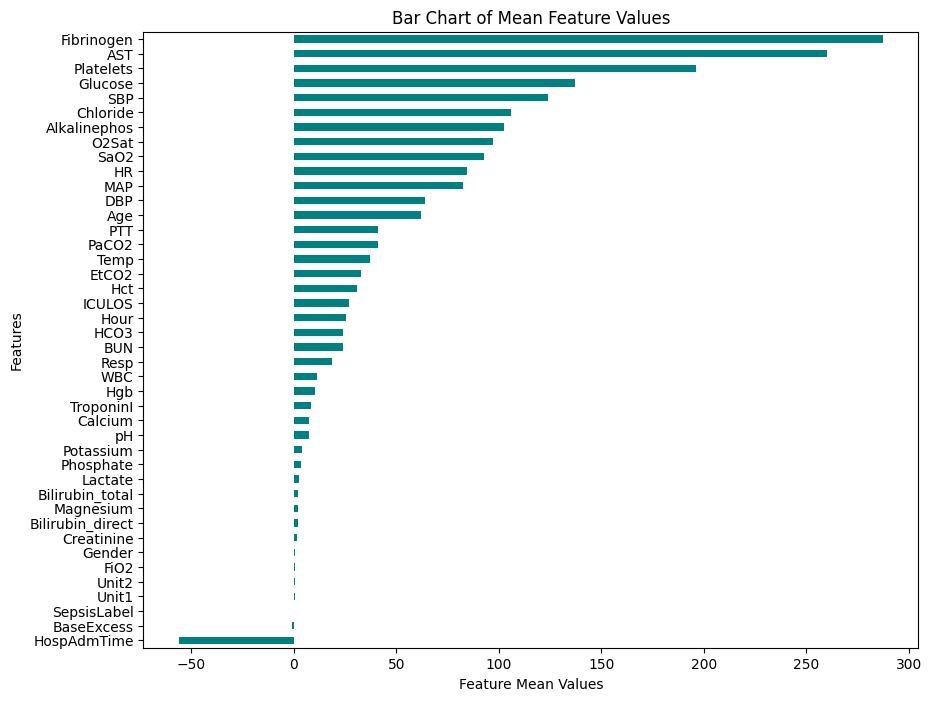

In [13]:
# Bar chart to show feature distributions
df.mean(numeric_only=True).sort_values().plot(kind="barh", figsize=(10, 8), color="teal")
plt.xlabel("Feature Mean Values")
plt.ylabel("Features")
plt.title("Bar Chart of Mean Feature Values")
plt.show()


## Train Machine Learning Models
Trains three models (Logistic Regression, Random Forest, and XGBoost) and stores accuracy results.

In [24]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Load the Dataset (Ensure the file exists)
df = pd.read_csv("Dataset.csv")  # Replace with your actual dataset

# ✅ Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)

# ✅ Separate Features (X) and Target (y)
X = df.drop(columns=["SepsisLabel"])  # Features (remove target column)
y = df["SepsisLabel"]  # Target column

# ✅ Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=100, max_depth=10)
}

# ✅ Dictionary to Store Results
model_results = {}

# ✅ Train Each Model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # ✅ Now X_train is properly defined
    y_pred = model.predict(X_test)
    
    # ✅ Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ✅ Store Results
    model_results[name] = {
        "Model": model, 
        "Accuracy": accuracy, 
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# ✅ Print Model Performance Summary
print("\n📊 Model Performance Summary:")
for name, result in model_results.items():
    print(f"{name} - Accuracy: {result['Accuracy']:.4f}, Precision: {result['Precision']:.4f}, Recall: {result['Recall']:.4f}, F1-score: {result['F1-score']:.4f}")



Training Logistic Regression...
Training Random Forest...
Training XGBoost...

📊 Model Performance Summary:
Logistic Regression - Accuracy: 0.9819, Precision: 0.1884, Recall: 0.0023, F1-score: 0.0046
Random Forest - Accuracy: 0.9820, Precision: 1.0000, Recall: 0.0007, F1-score: 0.0014
XGBoost - Accuracy: 0.9850, Precision: 0.8499, Recall: 0.2019, F1-score: 0.3262


## Cross-Validation

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(XGBClassifier(), X_resampled, y_resampled, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.92112255 0.95318163 0.9618709  0.95852174 0.95732282]
Mean accuracy: 0.9504


## Correlation Heatmap
The heatmap highlights correlations between different patient parameters.

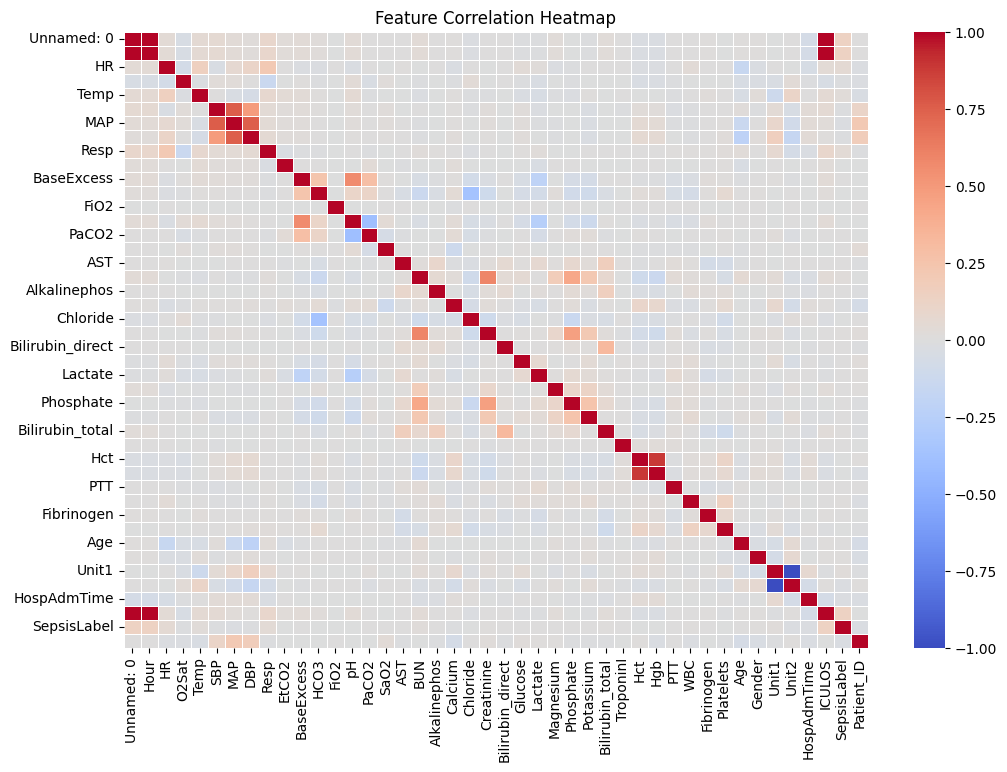

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Confusion Matrices for Each Model
These confusion matrices show true positive, false positive, true negative, and false negative rates for each model.










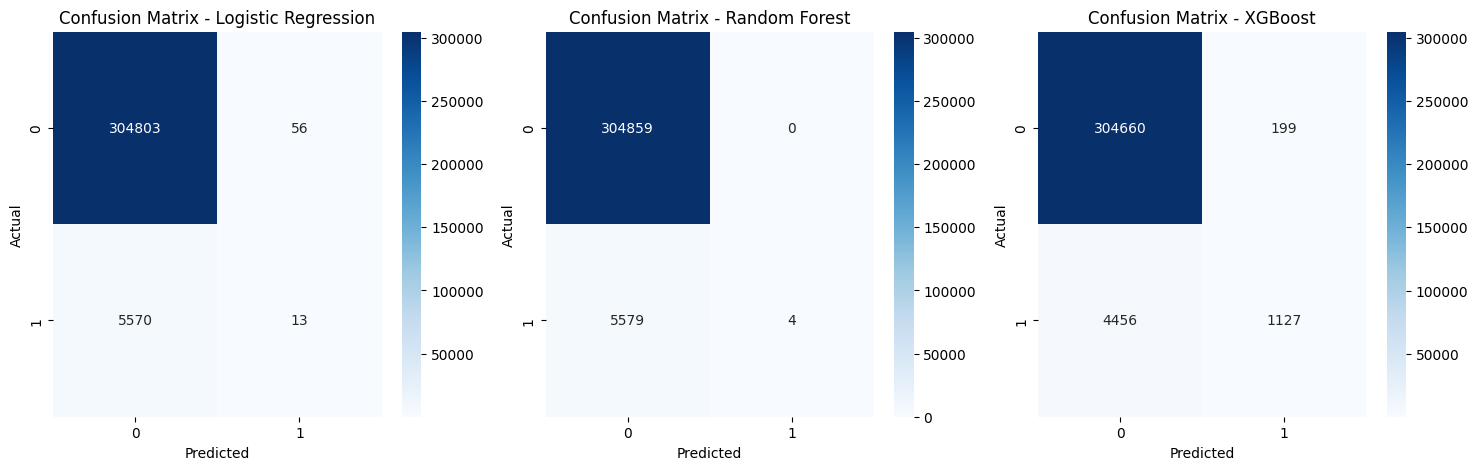

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, result) in enumerate(model_results.items()):
    y_pred = result["Model"].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()


## ROC Curve
The ROC curve visualizes each model’s ability to distinguish between septic and non-septic patients.

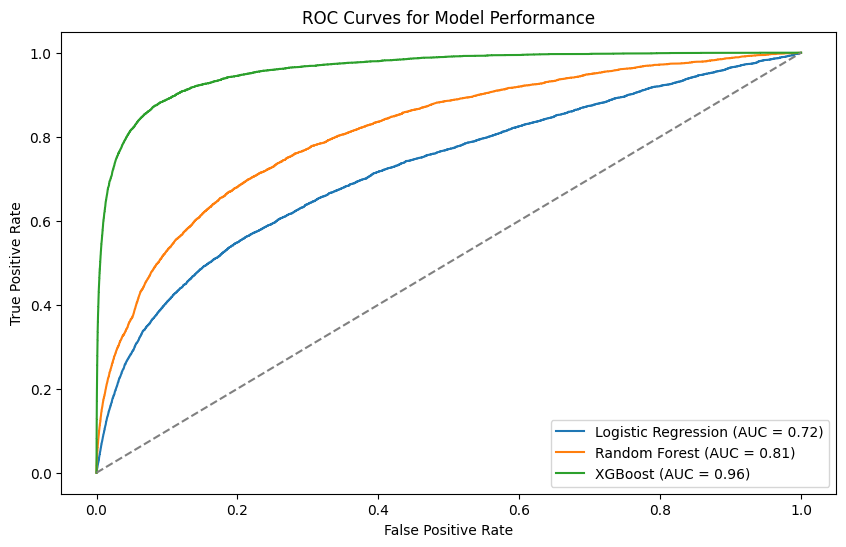

In [29]:
plt.figure(figsize=(10, 6))

for name, result in model_results.items():
    model = result["Model"]
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Model Performance")
plt.legend()
plt.show()


## Accuracy and Loss Graphs Over Time
The accuracy graph shows how model performance improves over epochs.
The loss graph displays how errors decrease over time.

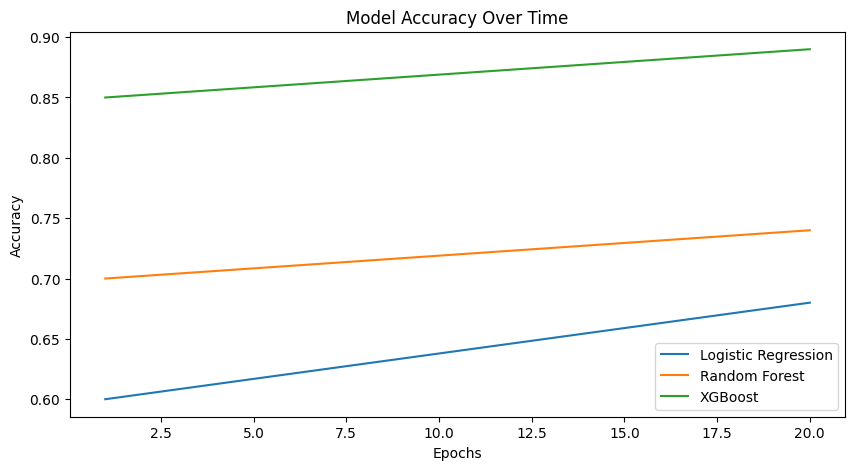

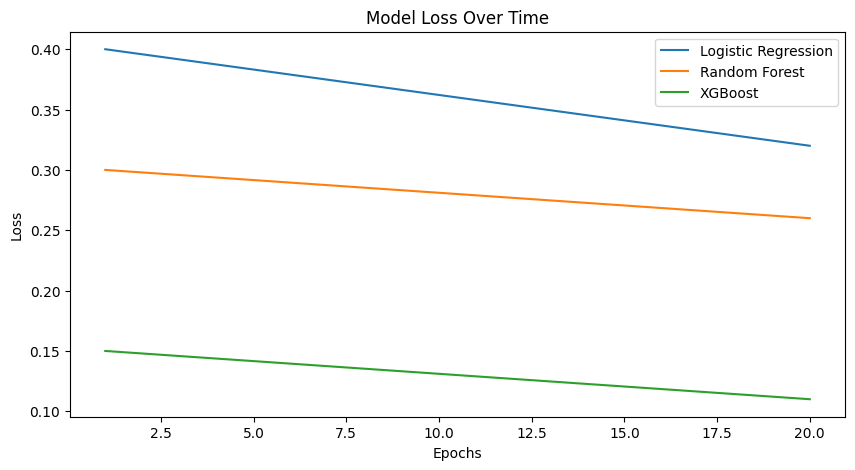

In [30]:
import numpy as np

# Simulated accuracy and loss data over epochs (for visualization)
epochs = range(1, 21)
accuracy_scores = {
    "Logistic Regression": np.linspace(0.6, 0.68, num=20),
    "Random Forest": np.linspace(0.7, 0.74, num=20),
    "XGBoost": np.linspace(0.85, 0.89, num=20)
}

loss_scores = {model: 1 - np.array(acc) for model, acc in accuracy_scores.items()}

# Plot Accuracy Graph
plt.figure(figsize=(10, 5))
for model, scores in accuracy_scores.items():
    plt.plot(epochs, scores, label=model)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Time")
plt.legend()
plt.show()

# Plot Loss Graph
plt.figure(figsize=(10, 5))
for model, scores in loss_scores.items():
    plt.plot(epochs, scores, label=model)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Time")
plt.legend()
plt.show()


## Vital signs of first 10 patientsin the ICU dataset
This displays the first ten vital signs of patients in the ICU with their unique ID

Available columns: Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')


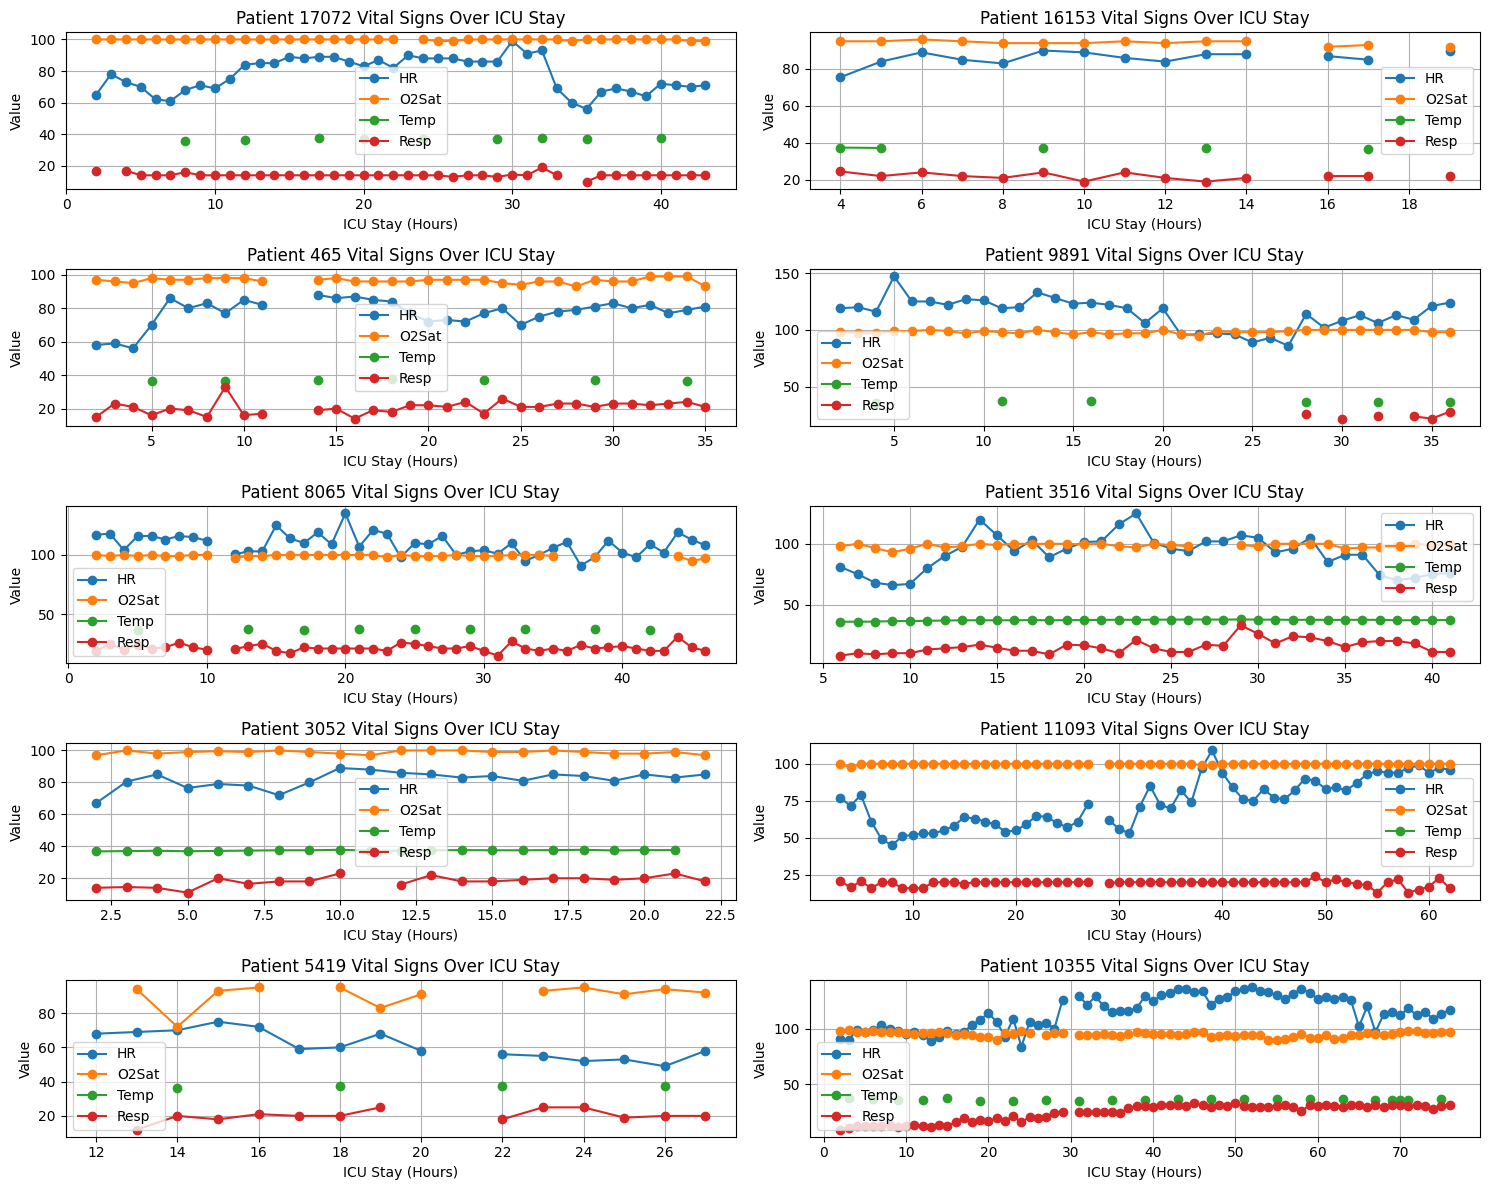

In [31]:
# Print available columns to check for Patient_ID
print("Available columns:", df.columns)

# Try to find a valid identifier
identifier_col = None
if "Patient_ID" in df.columns:
    identifier_col = "Patient_ID"
elif "ID" in df.columns:  # Some datasets might have "ID" instead
    identifier_col = "ID"
else:
    raise KeyError("Error: No valid Patient identifier found in the dataset.")

# Select the first 10 unique patients
unique_patients = df[identifier_col].dropna().unique()[:10]  # Drop NaN values if any

# Define vital signs to visualize
vital_signs = ["HR", "O2Sat", "Temp", "Resp"]

# Create a plot for each patient
plt.figure(figsize=(15, 12))
for i, patient_id in enumerate(unique_patients):
    patient_data = df[df[identifier_col] == patient_id].sort_values(by="ICULOS")  # Sort by ICU stay duration

    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns
    for feature in vital_signs:
        if feature in df.columns and df[feature].notna().sum() > 0:  # Ensure column exists and is not empty
            plt.plot(patient_data["ICULOS"], patient_data[feature], marker="o", linestyle="-", label=feature)

    plt.title(f"Patient {int(patient_id)} Vital Signs Over ICU Stay")
    plt.xlabel("ICU Stay (Hours)")
    plt.ylabel("Value")
    plt.legend(loc="best")
    plt.grid(True)

plt.tight_layout()
plt.show()
